# GRAPHS

In [1]:
from cube_fil_finder.vis import tree_vis
from cube_fil_finder.structs import util as struct_util
from cube_fil_finder.galfa import galfa_const
from cube_fil_finder.util import moments
from matplotlib import pyplot as plt
import numpy as np
import pickle
import pprint

%matplotlib inline

In [2]:
pickle_path_all_trees = '../pickled_dicts/fourth_batch/all_trees_1_8.p'  # 1-6 includes 1-8, for sky map plotting
all_trees = pickle.load(open(pickle_path_all_trees, 'rb'))

# Sky maps

### Distribution

/Users/larryli/anaconda/envs/py27research/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


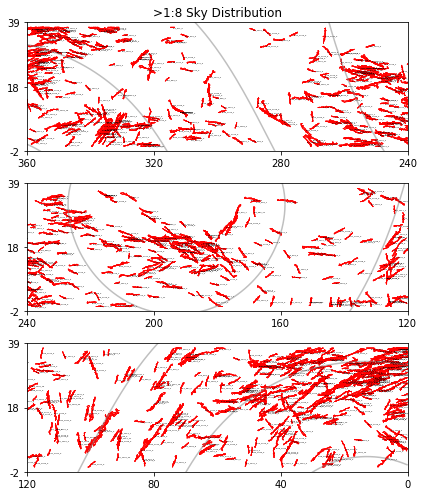

In [3]:
fig_sky_dist = tree_vis.vis_trees_sky_dist_names_3_panels(all_trees, '>1:8', return_fig=True)
fig_sky_dist.show()

In [5]:
fig_sky_dist.savefig('../vis/all_sky_maps_fourth_batch/sky_distribution_with_name.pdf')

In [2]:
pickle_path_all_tree_prop = '../pickled_dicts/all_sky_1_6_cut/all_sky_1_6_properties_fin.p'  # 1-6 includes 1-8
all_tree_prop = pickle.load(open(pickle_path_all_tree_prop, 'rb'))

In [4]:
# sample tree has fields:
sample_tree_prop = all_tree_prop['8972_995_0'].keys()
sample_tree_prop.sort()
pprint.pprint(sample_tree_prop)

['average_velocity',
 'column_density_mean',
 'column_density_median',
 'column_density_peak',
 'l_b',
 'moment_0_mean',
 'moment_0_median',
 'moment_0_peak',
 'moment_1_mean',
 'moment_1_median',
 'moment_2_mean',
 'moment_2_median',
 'moment_2_peak',
 'ra_dec',
 'roundness',
 'size',
 'starting_velocity',
 'velocity_span',
 'width_err',
 'width_fit']


In [5]:
print('x top: {}'.format(np.max([all_trees[k].root_node.corners[1][0] for k in all_trees])))
print('y top: {}'.format(np.max([all_trees[k].root_node.corners[1][1] for k in all_trees])))
print('x bottom: {}'.format(np.min([all_trees[k].root_node.corners[0][0] for k in all_trees])))
print('y bottom: {}'.format(np.min([all_trees[k].root_node.corners[0][1] for k in all_trees])))

x top: 21586
y top: 2331
x bottom: 14
y bottom: 100


In [6]:
# for y cutoffs, chose 2844_1029_0 for top(2329) and no tree is visibly being cut off at bottom
# for x cutoffs, chose 15 for bottom and 21580 for top
edge_trees_keys = []
for k in all_trees:
    corners = all_trees[k].root_node.corners
    if (corners[0][0] <= 15 or corners[1][0] >= 21580 or corners[1][1] >= 2329):
        edge_trees_keys.append(k)

In [7]:
print('{} edge trees'.format(len(edge_trees_keys)))

28 edge trees


In [8]:
# check for v span
v_span_long_trees = []
for k in all_trees:
    if all_trees[k].length > 15:
        v_span_long_trees.append(k)

In [9]:
print('{} trees that span more than 15 velocity channels'.format(len(v_span_long_trees)))

9 trees that span more than 15 velocity channels


In [10]:
bad_trees = edge_trees_keys + v_span_long_trees

In [11]:
bad_trees

['5216_1028_0',
 '7901_955_0',
 '2257_1024_0',
 '6499_985_0',
 '2431_1020_0',
 '1141_1011_0',
 '4753_990_0',
 '5903_1017_0',
 '2844_1029_0',
 '3482_975_0',
 '11792_1007_0',
 '11433_997_0',
 '2469_1013_0',
 '6932_974_0',
 '18355_1014_0',
 '1781_1023_0',
 '1882_1015_0',
 '5631_1028_0',
 '5150_1038_0',
 '10586_970_0',
 '10760_983_0',
 '8776_1030_0',
 '6720_1017_0',
 '6417_1022_0',
 '8738_1015_0',
 '3932_1027_0',
 '6012_1032_0',
 '12141_1018_0',
 '1995_1014_0',
 '7611_956_0',
 '5393_978_0',
 '6932_974_0',
 '13922_1031_0',
 '46955_1054_0',
 '9905_1061_0',
 '12603_1055_0',
 '5191_1032_0']

In [12]:
# list conversions for plotting
# uniform key access by area
good_tree_keys = [k for k in all_tree_prop if k not in bad_trees]
tree_keys_sorted_area = struct_util.sorted_struct_dict_keys_by_area(good_tree_keys, 'tree')

In [13]:
len(good_tree_keys)

525

#### lists for plotting

In [14]:
ras = np.asarray([all_tree_prop[k]['ra_dec'][0] for k in tree_keys_sorted_area])
decs = np.asarray([all_tree_prop[k]['ra_dec'][1] for k in tree_keys_sorted_area])
ls = np.asarray([all_tree_prop[k]['l_b'][0] for k in tree_keys_sorted_area])
bs = np.asarray([all_tree_prop[k]['l_b'][1] for k in tree_keys_sorted_area])

roundness = np.asarray([all_tree_prop[k]['roundness'] for k in tree_keys_sorted_area])

fwhm = np.asarray([all_tree_prop[k]['width_fit'][3] for k in tree_keys_sorted_area])

v_span = np.asarray([all_tree_prop[k]['velocity_span'] for k in tree_keys_sorted_area])

m1_mean = np.asarray([all_tree_prop[k]['moment_1_mean'] for k in tree_keys_sorted_area])
m1_median = np.asarray([all_tree_prop[k]['moment_1_median'] for k in tree_keys_sorted_area])
m2_mean = np.asarray([all_tree_prop[k]['moment_2_mean'] for k in tree_keys_sorted_area])
m2_median = np.asarray([all_tree_prop[k]['moment_2_median'] for k in tree_keys_sorted_area])
m2_peak = np.asarray([all_tree_prop[k]['moment_2_peak'] for k in tree_keys_sorted_area])
column_d_median = np.asarray([all_tree_prop[k]['column_density_median'] for k in tree_keys_sorted_area])
column_d_peak = np.asarray([all_tree_prop[k]['column_density_peak'] for k in tree_keys_sorted_area])
column_d_mean = np.asarray([all_tree_prop[k]['column_density_mean'] for k in tree_keys_sorted_area])
#np.asarray([all_tree_prop[k]['column_density_median'] for k in tree_keys_sorted_area])


'''
'average_velocity',
 'column_density_mean',
 'moment_0_mean',
 'moment_0_median',
 'moment_0_peak',

 'size',
 'starting_velocity',
 'width_err',
 'width_fit'
'''

"\n'average_velocity',\n 'column_density_mean',\n 'moment_0_mean',\n 'moment_0_median',\n 'moment_0_peak',\n\n 'size',\n 'starting_velocity',\n 'width_err',\n 'width_fit'\n"

In [20]:
idx_18 = np.where(roundness < 0.015624015624015624)
idx_16 = np.where(roundness > 0.015624015624015624)

### med velocity

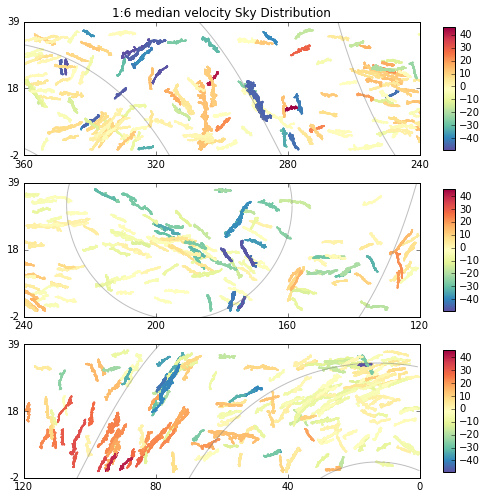

In [180]:
med_v_color = {}
for i in range(len(tree_keys_sorted_area)):
    med_v_color[tree_keys_sorted_area[i]] = m1_median[i] 
fig_sky_dist_mid_v = tree_vis.vis_trees_sky_dist_color_range_3_panels(all_trees, '1:6 Median Velocity', med_v_color, 'Spectral_r', return_fig=True)
fig_sky_dist_mid_v.show()

In [181]:
fig_sky_dist_mid_v.savefig('../vis/all_sky_maps_fin/sky_distribution_median_velocity.pdf')

### velocity span

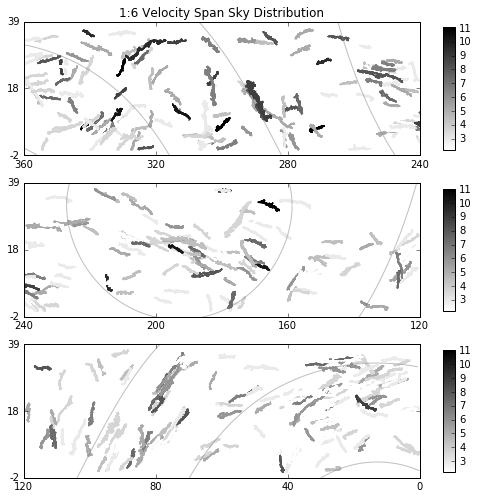

In [182]:
v_span_color = {}
for i in range(len(tree_keys_sorted_area)):
    v_span_color[tree_keys_sorted_area[i]] = v_span[i] 
fig_sky_dist_v_span = tree_vis.vis_trees_sky_dist_color_range_3_panels(all_trees, '1:6 Velocity Span', v_span_color, 'binary', return_fig=True)
fig_sky_dist_v_span.show()

In [184]:
fig_sky_dist_v_span.savefig('../vis/all_sky_maps_fin/sky_distribution_velocity_span.pdf')

### width 

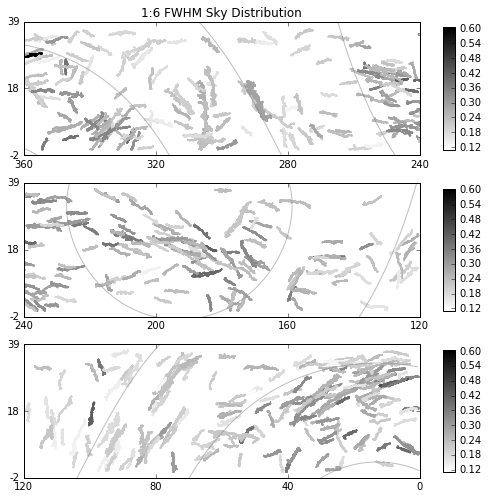

In [183]:
fwhm_color = {}
for i in range(len(tree_keys_sorted_area)):
    fwhm_color[tree_keys_sorted_area[i]] = fwhm[i] 
fig_sky_dist_fwhm = tree_vis.vis_trees_sky_dist_color_range_3_panels(all_trees, '1:6 FWHM', fwhm_color, 'binary', return_fig=True)
fig_sky_dist_fwhm.show()

In [185]:
fig_sky_dist_fwhm.savefig('../vis/all_sky_maps_fin/sky_distribution_fwhm.pdf')

### RA & DEC dist

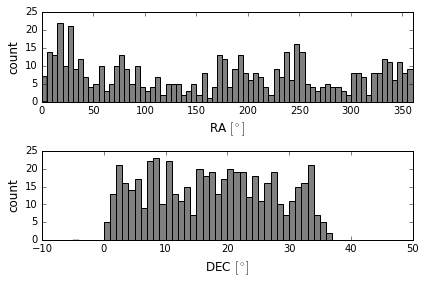

In [145]:
fig_ra_dec, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(6,4))

ax1.hist(ras, np.arange(0,361, 5), color='grey')

ax1.set_xlim([0,360])
ax1.set_xlabel(r'RA $[^\circ]$', fontsize=12)
ax1.set_ylabel('count', fontsize=12)

ax2.hist(decs, np.arange(-5,45, 1), color='grey')

ax2.set_xlabel(r'DEC $[^\circ]$', fontsize=12)
ax2.set_ylabel('count', fontsize=12)

fig_ra_dec.tight_layout()
fig_ra_dec.show()

### roundness distribution

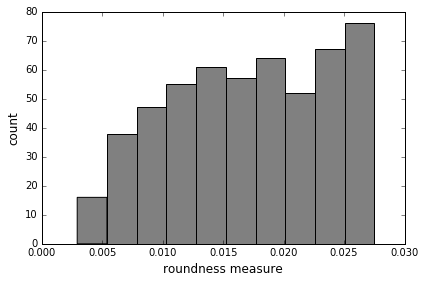

In [151]:
fig_roundess_hist, ax = plt.subplots(ncols=1, nrows=1)

ax.hist(roundness, color='grey')

ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('roundness measure', fontsize=12)

fig_roundess_hist.tight_layout()
fig_roundess_hist.show()

### width histograms

0.0619102024077


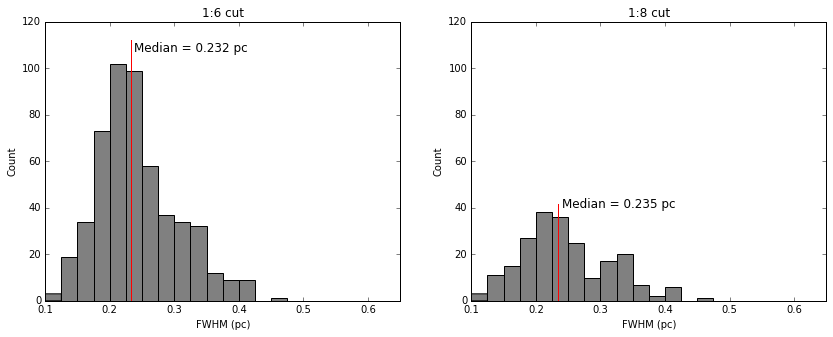

In [16]:
fig_width_hist, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

bins = np.arange(.1, .65, .025)

nanfwhm = [w for w in fwhm if not np.isnan(w)]

n_1_6, _, _ = ax1.hist(nanfwhm, bins, color='grey')
ax1.plot([np.median(nanfwhm), np.median(nanfwhm)], [0, max(n_1_6) * 1.1], color='red')
ax1.text(np.median(nanfwhm) + .005, max(n_1_6) * 1.05,
         'Median = {0:05.3f} pc'.format(np.median(nanfwhm)), fontsize=12)
ax1.set_title('1:6 cut')
print(np.nanstd(nanfwhm))


fwhm_1_8 = fwhm[np.where(roundness < moments.ROUNDNESS_AR_CONVERSION['1_8'])]
nanfwhm_1_8 = [w for w in fwhm_1_8 if not np.isnan(w)]

n_1_8, _, _ = ax2.hist(nanfwhm_1_8, bins, color='grey')
ax2.plot([np.median(nanfwhm_1_8), np.median(nanfwhm_1_8)], [0, max(n_1_8) * 1.1], color='red')
ax2.text(np.median(nanfwhm_1_8) + .005, max(n_1_8) * 1.05,
         'Median = {0:05.3f} pc'.format(np.median(nanfwhm_1_8)), fontsize=12)
ax2.set_title('1:8 cut')

for ax in [ax1, ax2]:
    ax.set_xlim(0.1, .65)
    ax.set_ylim(0, 120)
    ax.set_xlabel('FWHM (pc)')
    ax.set_ylabel('Count')

fig_width_hist.show()

In [186]:
fig_width_hist.savefig('../vis/all_sky_maps_fin/width_hist.pdf')

### width vs b

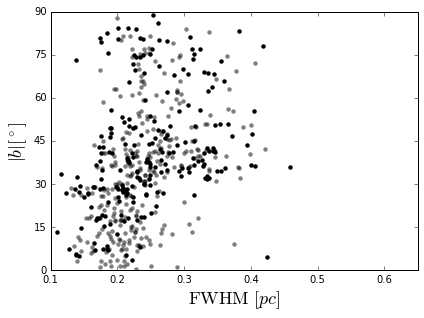

In [36]:
fig_width_b_abs, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4.5))

ax.scatter(fwhm[idx_18], np.abs(bs[idx_18]), marker='o', color='black', linewidths=0)
ax.scatter(fwhm[idx_16], np.abs(bs[idx_16]), marker='o', color='black', linewidths=0, alpha=.5)

ax.set_ylabel(r'$|b| [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ }[pc]$', fontsize=18)

ax.set_ylim([0, 90])
ax.set_xlim([0.1, 0.65]) # consistent with histograms

ax.set_yticks(np.linspace(0, 90, 7))
ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_b_abs.tight_layout()
fig_width_b_abs.show()

In [42]:
fig_width_b_abs.savefig('../vis/all_sky_maps_fin/width_b_abs.pdf')

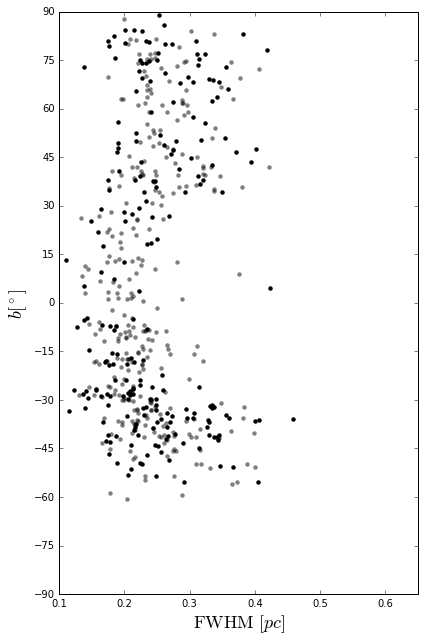

In [37]:
fig_width_b, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,9))

ax.scatter(fwhm[idx_18], bs[idx_18], color='black', linewidths=0)
ax.scatter(fwhm[idx_16], bs[idx_16], marker='o', color='black', linewidths=0, alpha=.5)

ax.set_ylabel(r'$b [^\circ]$', fontsize=18)
ax.set_xlabel(r'$\mathrm{FWHM\ }[pc]$', fontsize=18)

ax.set_ylim([0, 90])
ax.set_xlim([0.1, 0.65]) # consistent with histograms

ax.set_yticks(np.arange(-90, 91, 15))
ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_b.tight_layout()
fig_width_b.show()

In [38]:
fig_width_b.savefig('../vis/all_sky_maps_fin/width_b.pdf')

### width & l

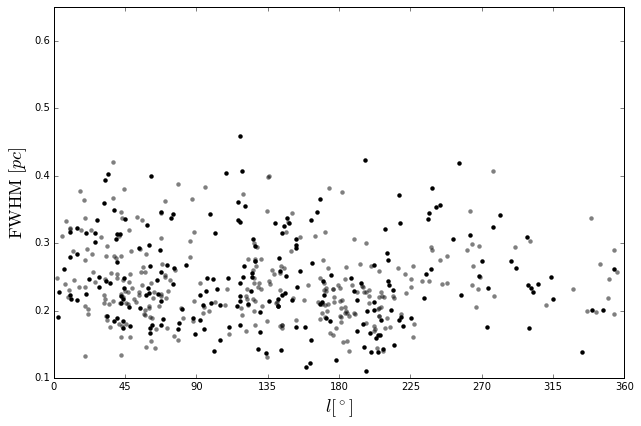

In [40]:
fig_width_l, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

ax.scatter(ls[idx_18], fwhm[idx_18], marker='o', color='black', linewidths=0)
ax.scatter(ls[idx_16], fwhm[idx_16], marker='o', color='black', linewidths=0, alpha=.5)

ax.set_xlabel(r'$l [^\circ]$', fontsize=18)
ax.set_ylabel(r'$\mathrm{FWHM\ }[pc]$', fontsize=18)

ax.set_xlim([0, 360])
ax.set_ylim([0.1, 0.65]) # consistent with histograms

ax.set_xticks(np.linspace(0, 360, 9))
ax.set_yticks(np.arange(0.1, 0.65, .1))

fig_width_l.tight_layout()
fig_width_l.show()

In [41]:
fig_width_l.savefig('../vis/all_sky_maps_fin/width_l.pdf')

### width & column density

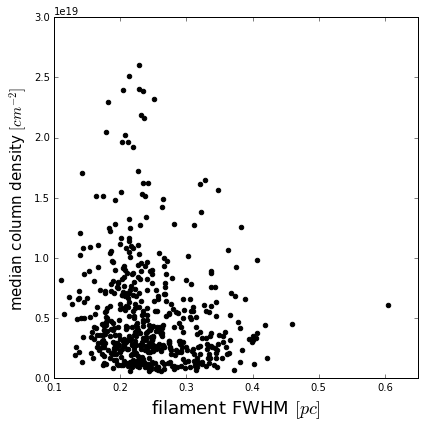

In [223]:
fig_width_column_d, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter(fwhm, column_d_median, marker='o', color='black')

ax.set_ylabel(r'median column density $[cm^{-2}]$', fontsize=15)
ax.set_xlabel(r'$\mathrm{FWHM\ }[pc]$', fontsize=18)

ax.set_ylim(0, 3e19)
ax.set_xlim([0.1, 0.65]) # consistent with histograms

#ax.set_yticks(np.linspace(0, 90, 7))
ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_column_d.tight_layout()
fig_width_column_d.show()

In [230]:
fig_width_column_d.savefig('../vis/all_sky_maps_fin/width_column_d_median.pdf')

### width vs v dispersion

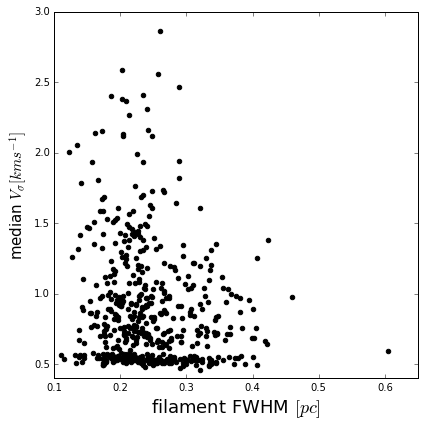

In [228]:
fig_width_v_disp, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter(fwhm, m2_median, marker='o', color='black')

ax.set_ylabel(r'median $ V_\sigma[kms^{-1}]$', fontsize=15)
ax.set_xlabel(r'filament FWHM $[pc]$', fontsize=18)

ax.set_ylim(0.4)
ax.set_xlim([0.1, 0.65]) # consistent with histograms

ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_v_disp.tight_layout()
fig_width_v_disp.show()

In [231]:
fig_width_v_disp.savefig('../vis/all_sky_maps_fin/width_v_disp_median.pdf')

### width & median velocity

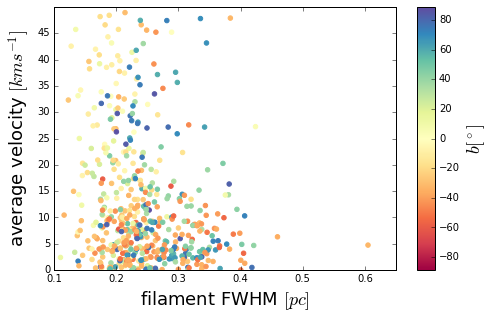

In [238]:
fig_width_median_v, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4.5))

max_b = np.max(bs)
ax.scatter(fwhm, abs(m1_median), c=bs,
           norm=plt.Normalize(vmin=-max_b, vmax=max_b), marker='o', cmap='Spectral', edgecolors='face')

sm = plt.cm.ScalarMappable(cmap='Spectral',
                           norm=plt.Normalize(vmin=-max_b, vmax=max_b))
sm._A = []
cbar = fig_width_median_v.colorbar(sm, ax=ax, aspect=15, shrink=1)
cbar.set_label(r'$b [^\circ]$', fontsize=18)

ax.set_xlabel(r'filament FWHM $[pc]$', fontsize=18)
ax.set_ylabel(r'average velocity $[km s^{-1}]$', fontsize=18)

ax.set_ylim([0,50])
ax.set_xlim([0.1, 0.65]) # consistent with histograms

ax.set_yticks(np.arange(0, 50, 5))
ax.set_xticks(np.arange(.1, .65, .1))

fig_width_median_v.tight_layout()
fig_width_median_v.show()

In [242]:
fig_width_median_v.savefig('../vis/all_sky_maps_fin/width_median_v.pdf')

### column density & b

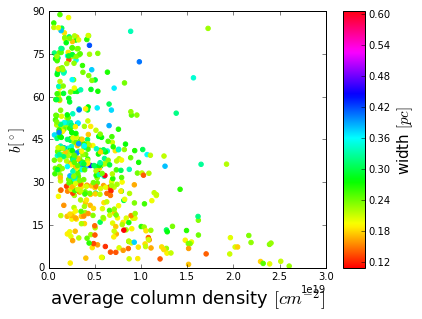

In [252]:
fig_column_d_b_abs, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4.5))

ax.scatter(column_d_median, np.abs(bs), c=fwhm, marker='o', cmap='hsv', edgecolors='face')

sm = plt.cm.ScalarMappable(cmap='hsv',
                           norm=plt.Normalize(vmin=min(fwhm), vmax=max(fwhm)))
sm._A = []
cbar = fig_column_d_b.colorbar(sm, ax=ax, aspect=12, shrink=1)
cbar.set_label(r'width $[pc]$', fontsize=15)

ax.set_ylabel(r'$b [^\circ]$', fontsize=15)
ax.set_xlabel(r'average column density $[cm^{-2}]$', fontsize=18)

ax.set_ylim([0, 90])
ax.set_xlim([0, 3e19]) # consistent with histograms

ax.set_yticks(np.arange(0, 90.1, 15))

fig_column_d_b_abs.tight_layout()
fig_column_d_b_abs.show()

In [253]:
fig_column_d_b_abs.savefig('../vis/all_sky_maps_fin/column_density_b_abs.pdf')

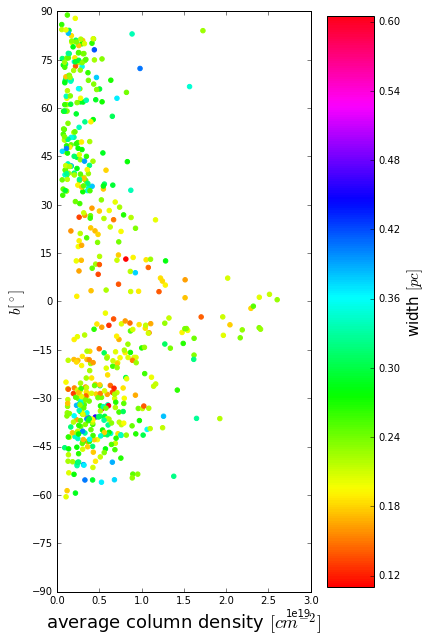

In [255]:
fig_column_d_b, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,9))

ax.scatter(column_d_median, bs, c=fwhm, marker='o', cmap='hsv', edgecolors='face')

sm = plt.cm.ScalarMappable(cmap='hsv',
                           norm=plt.Normalize(vmin=min(fwhm), vmax=max(fwhm)))
sm._A = []
cbar = fig_column_d_b.colorbar(sm, ax=ax, aspect=12, shrink=1)
cbar.set_label(r'width $[pc]$', fontsize=15)

ax.set_ylabel(r'$b [^\circ]$', fontsize=15)
ax.set_xlabel(r'average column density $[cm^{-2}]$', fontsize=18)

ax.set_ylim([-90, 90])
ax.set_xlim([0, 3e19]) # consistent with histograms

ax.set_yticks(np.arange(-90, 90.1, 15))
#ax.set_xticks(np.linspace(0.1, 0.45, 8))

fig_column_d_b.tight_layout()
fig_column_d_b.show()

In [256]:
fig_column_d_b.savefig('../vis/all_sky_maps_fin/column_density_b.pdf')

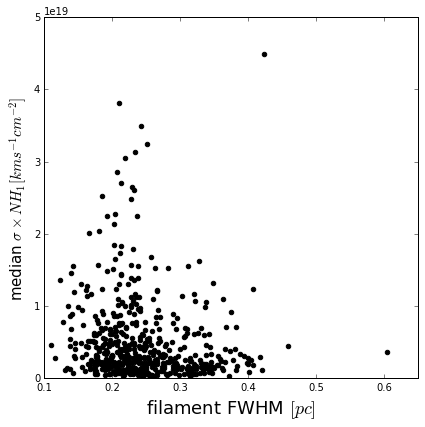

In [266]:
fig_width_v_disp_c, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter(fwhm, m2_median*column_d_median, marker='o', color='black')

ax.set_ylabel(r'median $ \sigma \times NH_1[kms^{-1}cm^{-2}]$', fontsize=15)
ax.set_xlabel(r'filament FWHM $[pc]$', fontsize=18)

ax.set_ylim(0,.5e20)
ax.set_xlim([0.1, 0.65]) # consistent with histograms

ax.set_xticks(np.arange(0.1, 0.65, .1))

fig_width_v_disp_c.tight_layout()
fig_width_v_disp_c.show()

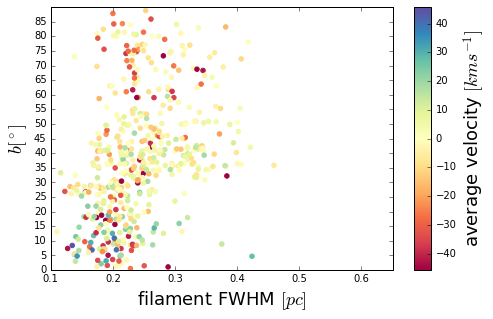

In [23]:
fig_width_median_v, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4.5))

max_v = np.max(m1_median)
ax.scatter(fwhm, abs(bs), c=m1_median,
           norm=plt.Normalize(vmin=-max_v, vmax=max_v), marker='o', cmap='Spectral', edgecolors='face')

sm = plt.cm.ScalarMappable(cmap='Spectral',
                           norm=plt.Normalize(vmin=-max_v, vmax=max_v))
sm._A = []
cbar = fig_width_median_v.colorbar(sm, ax=ax, aspect=15, shrink=1)
cbar.set_label(r'average velocity $[km s^{-1}]$', fontsize=18)

ax.set_xlabel(r'filament FWHM $[pc]$', fontsize=18)
ax.set_ylabel(r'$b [^\circ]$', fontsize=18)

ax.set_ylim([0,90])
ax.set_xlim([0.1, 0.65]) # consistent with histograms

ax.set_yticks(np.arange(0, 90, 5))
ax.set_xticks(np.arange(.1, .65, .1))

fig_width_median_v.tight_layout()
fig_width_median_v.show()

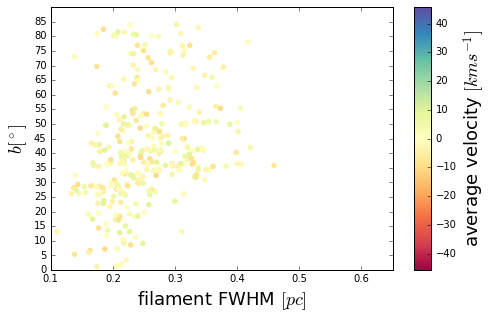

In [16]:
fig_width_median_v, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4.5))

max_v = np.max(m1_median)
ind_low_v = np.where(np.abs(m1_median) < 10) 
ax.scatter(fwhm[ind_low_v], abs(bs[ind_low_v]), c=m1_median[ind_low_v],
           norm=plt.Normalize(vmin=-max_v, vmax=max_v), marker='o', cmap='Spectral', edgecolors='face')

sm = plt.cm.ScalarMappable(cmap='Spectral',
                           norm=plt.Normalize(vmin=-max_v, vmax=max_v))
sm._A = []
cbar = fig_width_median_v.colorbar(sm, ax=ax, aspect=15, shrink=1)
cbar.set_label(r'average velocity $[km s^{-1}]$', fontsize=18)

ax.set_xlabel(r'filament FWHM $[pc]$', fontsize=18)
ax.set_ylabel(r'$b [^\circ]$', fontsize=18)

ax.set_ylim([0,90])
ax.set_xlim([0.1, 0.65]) # consistent with histograms

ax.set_yticks(np.arange(0, 90, 5))
ax.set_xticks(np.arange(.1, .65, .1))

fig_width_median_v.tight_layout()
fig_width_median_v.show()

(525,)

In [45]:
all_tree_prop['42418_955_0']

{'average_velocity': -47.11186173,
 'column_density_mean': 8.5237993655422419e+19,
 'column_density_median': 6.9554901312210043e+19,
 'column_density_peak': 4.4416019098806459e+20,
 'l_b': [48.80123929053362, 1.0819913642518875],
 'moment_0_mean': 46.756990485695241,
 'moment_0_median': 38.154087390131679,
 'moment_0_peak': 243.64245254419342,
 'moment_1_mean': -45.189723571448283,
 'moment_1_median': -45.228700635331329,
 'moment_2_mean': 1.7464783232063621,
 'moment_2_median': 1.8164365358494854,
 'moment_2_peak': 4.0486750082520278,
 'ra_dec': [289.25855185, 14.591691149999999],
 'roundness': 0.02525203688159916,
 'size': 42418,
 'starting_velocity': -50.42441451,
 'velocity_span': 8.833474079999998,
 'width_err': array([ 0.18053408,  0.00470517,  0.22423453,  0.01205014]),
 'width_fit': array([ 42.70878273,   0.13343276,  12.58143194,   0.28890927])}

In [46]:
all_tree_prop['11127_976_0']

{'average_velocity': -32.389404940000006,
 'column_density_mean': 2.9622783181761561e+19,
 'column_density_median': 2.321460548280166e+19,
 'column_density_peak': 1.691857117424619e+20,
 'l_b': [70.06182642448108, -1.4694046224464747],
 'moment_0_mean': 16.249469655382086,
 'moment_0_median': 12.734287154581272,
 'moment_0_peak': 92.806205015064123,
 'moment_1_mean': -31.707453428063943,
 'moment_1_median': -31.497109014561982,
 'moment_2_mean': 1.3139653267764899,
 'moment_2_median': 1.394545279242382,
 'moment_2_peak': 2.9206488286184347,
 'ra_dec': [303.35858005, 31.691725350000002],
 'roundness': 0.022975310478867507,
 'size': 11127,
 'starting_velocity': -34.96583488,
 'velocity_span': 6.62510556,
 'width_err': array([ 0.13982729,  0.00535178,  0.13045719,  0.01405188]),
 'width_fit': array([ 16.13951998,   0.1185954 ,   3.31062958,   0.25046508])}

In [47]:
all_tree_prop['10600_1056_0']

{'average_velocity': 26.50042223,
 'column_density_mean': 3.792884192710221e+19,
 'column_density_median': 3.259687740888907e+19,
 'column_density_peak': 1.4779252235850777e+20,
 'l_b': [196.30178030335736, 4.7243623209972645],
 'moment_0_mean': 20.805727881021507,
 'moment_0_median': 17.880898194673104,
 'moment_0_peak': 81.071049017283471,
 'moment_1_mean': 27.335042815673916,
 'moment_1_median': 27.272976093176656,
 'moment_2_mean': 1.3336762564252631,
 'moment_2_median': 1.3793740351498864,
 'moment_2_peak': 2.9441637853728881,
 'ra_dec': [99.458172250000004, 16.941695849999999],
 'roundness': 0.013764464783447321,
 'size': 10600,
 'starting_velocity': 23.92399229,
 'velocity_span': 6.62510556,
 'width_err': array([ 0.17599316,  0.00922623,  0.35678207,  0.02262979]),
 'width_fit': array([ 19.33724949,   0.18750476,   4.63367357,   0.42390813])}

In [48]:
all_tree_prop['5392_1010_0']

{'average_velocity': -6.62510556,
 'column_density_mean': 8.3529501493171558e+18,
 'column_density_median': 6.2988374067893412e+18,
 'column_density_peak': 3.8002839191191863e+19,
 'l_b': [52.03779784273347, 23.100030891210118],
 'moment_0_mean': 4.5819803342387022,
 'moment_0_median': 3.4552042823858153,
 'moment_0_peak': 20.846318810308208,
 'moment_1_mean': -5.2887842419098137,
 'moment_1_median': -5.0187242381942898,
 'moment_2_mean': 2.1651328026499383,
 'moment_2_median': 2.2674630685433637,
 'moment_2_peak': 4.1687340467257279,
 'ra_dec': [269.15851164999998, 26.541715050000001],
 'roundness': 0.022596883138341819,
 'size': 5392,
 'starting_velocity': -9.93765833,
 'velocity_span': 9.569596919999999,
 'width_err': array([ 0.01898769,  0.00183105,  0.02932213,  0.00498572]),
 'width_fit': array([ 5.59780351,  0.10448383,  0.34278038,  0.21278285])}